# Final Assignment for Python: Water MD Simulation

   ### Class: F2011002 (SCCE); 
   ### Name: Zhenghong Chen; 
   ### Stu-ID: 520021911242;
   ### Date: 2023-01-06

**避免一次性读入大量数据超过内存池允许上限，将crj文件按照帧数分为1000个csv子文件

# Radial distribution function

# Water in 273K, sample per 10 frames, Step dr=0.5A

151399


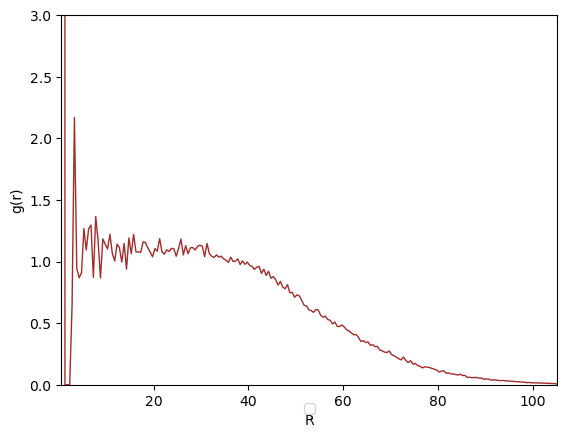

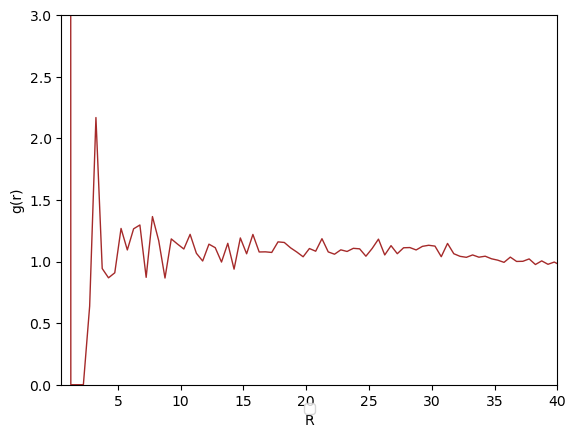

Current memory usage is 0.000933MB; Peak was 0.011158MB
time consumed：5.75 s


In [1]:
# RDF in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 10 frames per sample once
# STEP=0.5A
g_r=[]
r_x=[]
r=0.25
radial=[]
for i in range(0,1001,10):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*100:
    n = 0
    r=r+0.5
    while (radial[k]<r and k<1499*100):
        n=n+1
        k=k+1
    r_x.append(r)
    g_r.append((757.5*n/(4*3.1415926*r*r*0.5*100)))
# normalization factor
    
#print(g_r[60])
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.5,r])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

        
plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.5,40])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

** 备注： 由于该模拟文件并不是在有限容器内均匀分布，而是存在向外扩散的非平衡过程，故而g(r)并不满足在无穷大时收敛limg(r)=1的条件，在此可以观察到20~40A时g(r)基本稳定，将该值作为收敛值。

# Water in 273K, sample per 10 frames, Step dr=0.1 A

151399


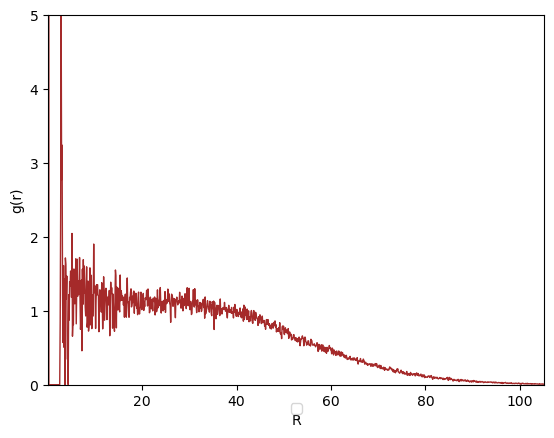

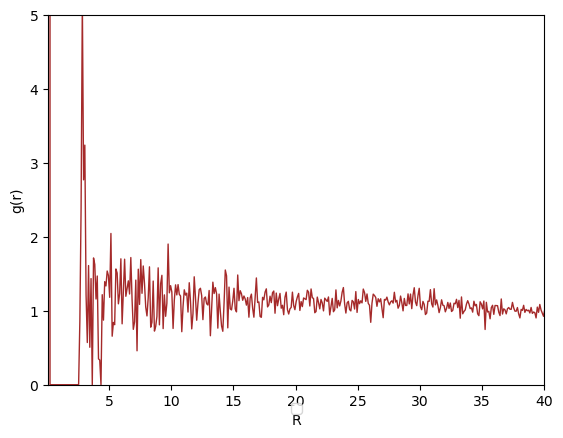

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：5.04 s


In [2]:
# RDF in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 10 frames per sample once
# STEP=0.1A
g_r=[]
r_x=[]
r=0.05
radial=[]
for i in range(0,1001,10):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*100:
    n = 0
    r=r+0.1
    while (radial[k]<r and k<1499*100):
        n=n+1
        k=k+1
    r_x.append(r)
    g_r.append((757.8*n/(4*3.1415926*r*r*0.1*100)))
    #print(g_r)
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.1,r])
plt.ylim([0,5])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.1,40])
plt.ylim([0,5])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()
        


#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water in 273K, sample per 10 frames, Step dr=0.01 A

151399


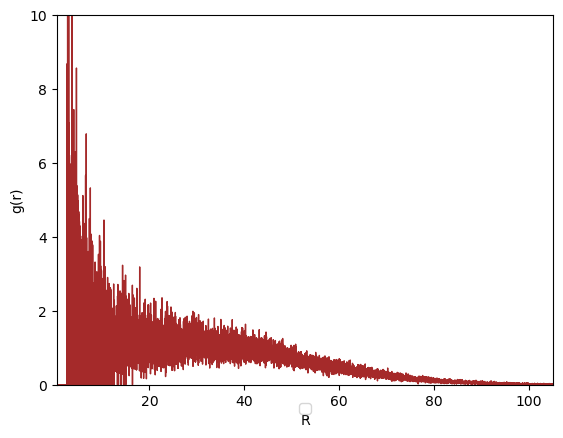

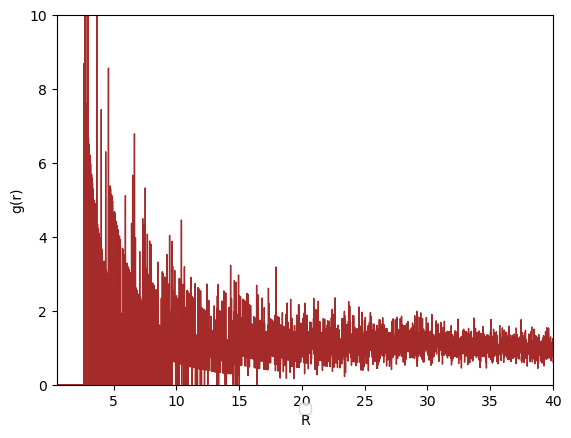

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：5.04 s


In [3]:
# RDF in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# STEP=0.01A
g_r=[]
r_x=[]
r=0.005
radial=[]
for i in range(0,1001,10):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*100:
    n = 0
    r=r+0.01
    while (radial[k]<r and k<1499*100):
        n=n+1
        k=k+1
    #print(n)
    r_x.append(r)
    g_r.append([757.8*(n/(4*3.1415926*r*r*0.01*100))])
#print(g_r)
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.5,r])
plt.ylim([0,10])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.5,40])
plt.ylim([0,10])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water in 273K, sample per 1 frame, Step dr=0.5 A

1500499


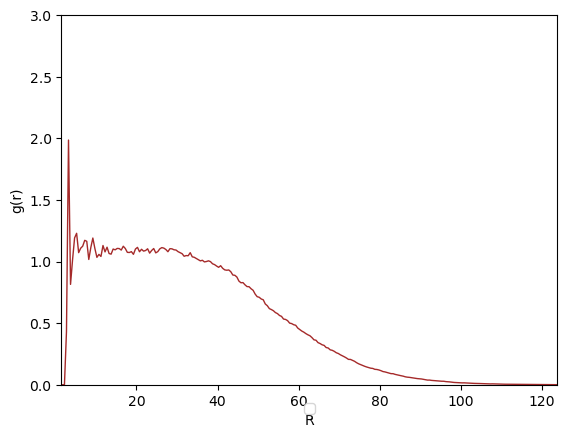

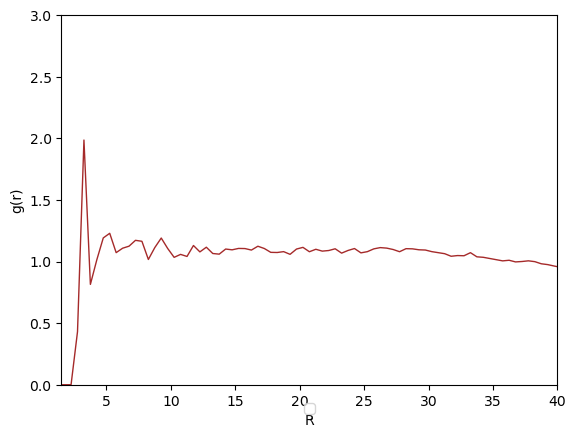

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：51.76 s


In [4]:
# RDF in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 1 frames per sample once
# STEP=0.5A
g_r=[]
r_x=[]
r=0.25
radial=[]
for i in range(0,1001):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*1000:
    n = 0
    r=r+0.5
    while (radial[k]<r and k<1499*1000):
        n=n+1
        k=k+1
    r_x.append(r)
    g_r.append((757.5*n/(4*3.1415926*r*r*0.5*1000)))
# normalization factor
    
#print(g_r[60])
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([1.5,r])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

        
plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([1.5,40])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water in 273K, sample per 10 frames, Step dr=1 A

151399


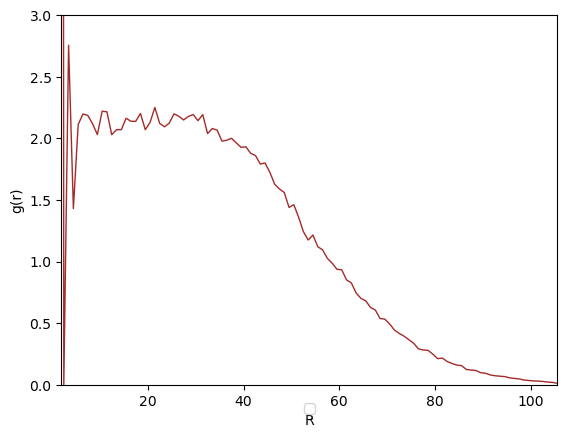

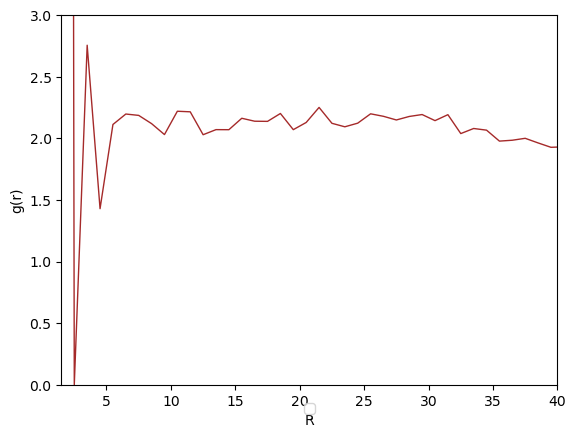

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：5.32 s


In [5]:
# RDF in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 10 frames per sample once
# STEP=1A
g_r=[]
r_x=[]
r=0.5
radial=[]
for i in range(0,1001,10):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*100:
    n = 0
    r=r+1
    while (radial[k]<r and k<1499*100):
        n=n+1
        k=k+1
    r_x.append(r)
    g_r.append((757.5*n/(4*3.1415926*r*r*0.5*100)))
# normalization factor
    
#print(g_r[60])
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([2,r])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

        
plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([1.5,40])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water in 273K, sample per 100 frames, Step dr=0.5 A

16489


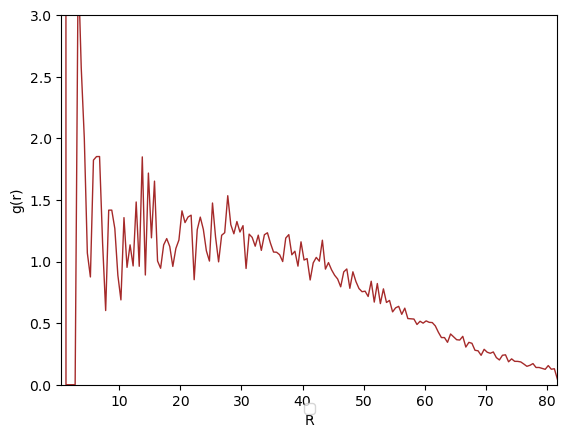

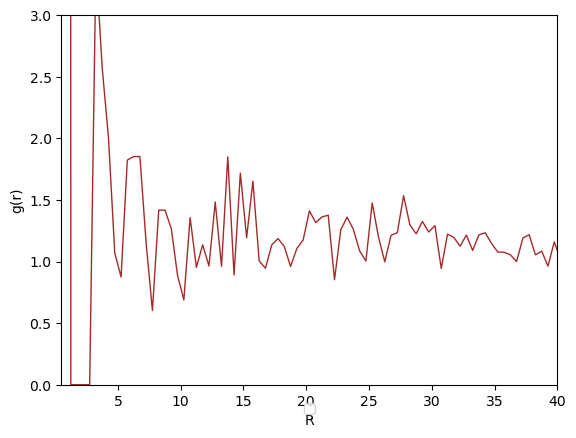

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：0.94 s


In [6]:
# RDF in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 100 frames per sample once
# STEP=0.5A
g_r=[]
r_x=[]
r=0.25
radial=[]
for i in range(0,1001,100):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*10:
    n = 0
    r=r+0.5
    while (radial[k]<r and k<1499*10):
        n=n+1
        k=k+1
    r_x.append(r)
    g_r.append((757.5*n/(4*3.1415926*r*r*0.5*10)))
# normalization factor
    
#print(g_r[60])
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.5,r])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

        
plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([0.5,40])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water in 300K, sample per 10 frames, Step dr=0.5 A

151399
1.0150199657455572


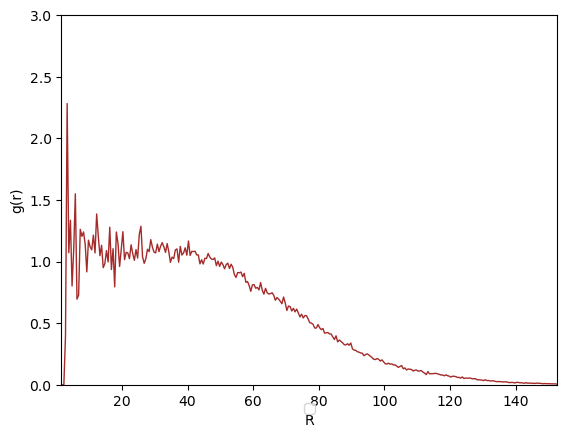

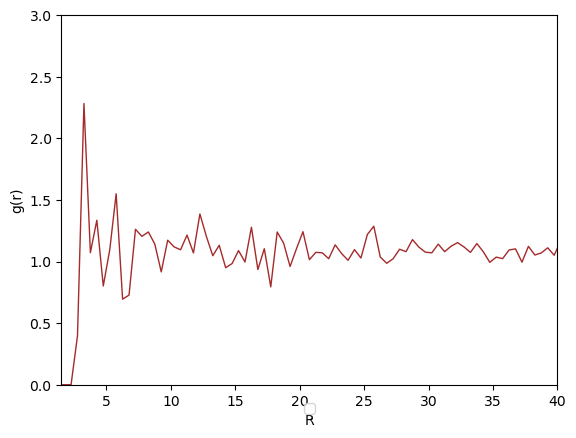

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：5.30 s


In [7]:
# RDF in 300K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 10 frames per sample once
# STEP=0.5A
g_r=[]
r_x=[]
r=0.25
radial=[]
for i in range(0,1001,10):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_300/water_300_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*100:
    n = 0
    r=r+0.5
    while (radial[k]<r and k<1499*100):
        n=n+1
        k=k+1
    r_x.append(r)
    g_r.append((2.5*757.5*n/(4*3.1415926*r*r*0.5*100)))
# normalization factor
    
print(g_r[40])
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([1.5,r])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

        
plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([1.5,40])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water in 400K, sample per 10 frames, Step dr=0.5 A

151399
1.0077885786175265


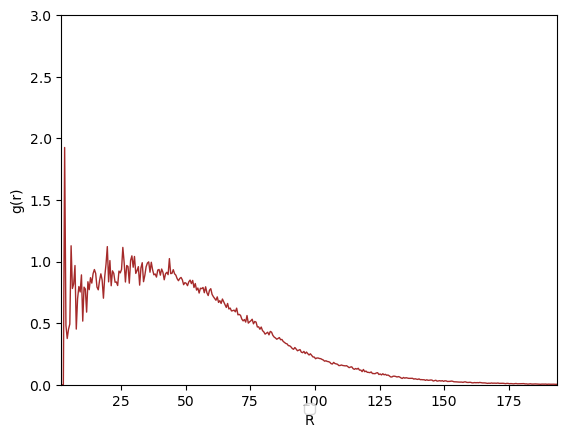

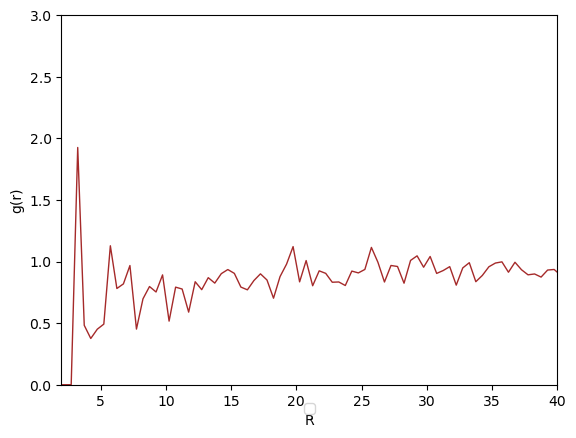

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：5.32 s


In [8]:
# RDF in 400K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 10 frames per sample once
# STEP=0.5A
g_r=[]
r_x=[]
r=0.25
radial=[]
for i in range(0,1001,10):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_400/water_400_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
    for j in range(0,4497,3):
        coord=([(atom_coord[j][0]+atom_coord[j+1][0]+atom_coord[j+2][0])/3, (atom_coord[j][1]+atom_coord[j+1][1]+atom_coord[j+2][1])/3, (atom_coord[j][2]+atom_coord[j+1][2]+atom_coord[j+2][2])/3])
        #print(j,coord)
        radial.append(math.sqrt((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2))
    #print(radial)
    coord.clear()
    coord0.clear()
radial.sort( key=None, reverse=False)
print(len(radial))
k=1
while k<1499*100:
    n = 0
    r=r+0.5
    while (radial[k]<r and k<1499*100):
        n=n+1
        k=k+1
    r_x.append(r)
    g_r.append((2.81*758*n/(4*3.1415926*r*r*0.5*100)))
# normalization factor
    
print(g_r[40])
radial.clear()
    

plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([2,r])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

        
plt.plot(r_x, g_r, color='brown', lw=1, )
plt.xlim([2,40])
plt.ylim([0,3])
plt.ylabel('g(r)')
plt.xlabel('R')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()
r_x.clear()
g_r.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Mean-Squared Displacement

# Water MSD in 273K, sample per 10 frames, averaged by 1500 molecules

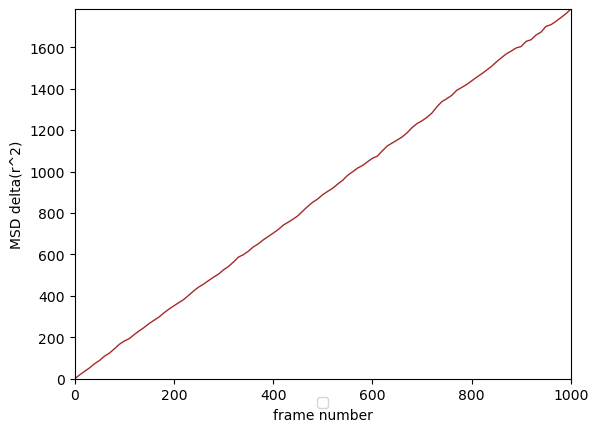

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：3.02 s


In [9]:
# MSD in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()


dr=[]
t=[]
radial=[]
coord0=[]

i=0
dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
atom_coord = dataset.iloc[:, [2,3,4]].values
for j in range(0,4498,3):
    coord0.append([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])

# 10 frames per sample once
for i in range(0,1001,10):
    r=0
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    for j in range(0,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
        #print(j,coord)
        r=r+((coord[0]-coord0[j//3][0])**2+(coord[1]-coord0[j//3][1])**2+(coord[2]-coord0[j//3][2])**2)/1499
    dr.append(r)
    t.append(i)
    coord.clear()

coord0.clear()
#print(dr)



    

plt.plot(t, dr, color='brown', lw=1, )
plt.xlim([0,1000])
plt.ylim([0,dr[100]])
plt.ylabel('MSD delta(r^2)')
plt.xlabel('frame number')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

dr.clear()
t.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water MSD in 273K, sample per 1 frame, averaged by 1500 molecules

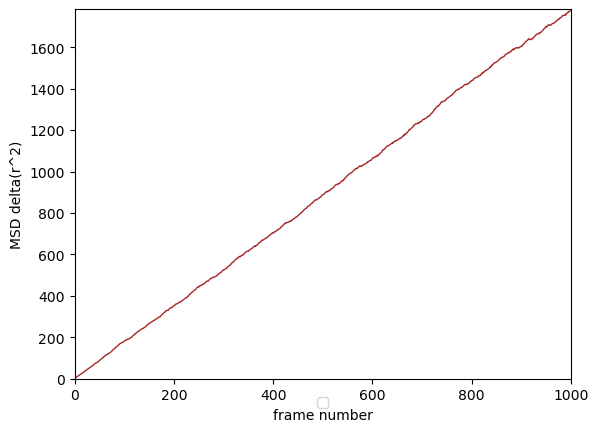

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：26.58 s


In [10]:
# MSD in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()


dr=[]
t=[]
radial=[]
coord0=[]

i=0
dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
atom_coord = dataset.iloc[:, [2,3,4]].values
for j in range(0,4498,3):
    coord0.append([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])

# 1 frames per sample once
for i in range(0,1001):
    r=0
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    for j in range(0,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
        #print(j,coord)
        r=r+((coord[0]-coord0[j//3][0])**2+(coord[1]-coord0[j//3][1])**2+(coord[2]-coord0[j//3][2])**2)/1499
    dr.append(r)
    t.append(i)
    coord.clear()

coord0.clear()
#print(dr)



    

plt.plot(t, dr, color='brown', lw=1, )
plt.xlim([0,1000])
plt.ylim([0,dr[1000]])
plt.ylabel('MSD delta(r^2)')
plt.xlabel('frame number')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

dr.clear()
t.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water MSD in 273K, sample per 100 frames, averaged by 1500 molecules

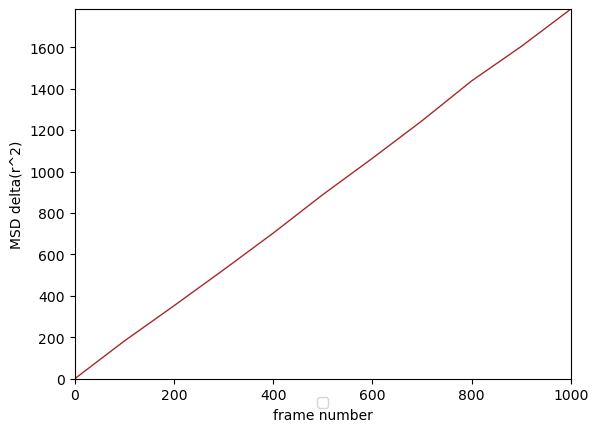

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：0.50 s


In [11]:
# MSD in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()


dr=[]
t=[]
radial=[]
coord0=[]

i=0
dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
atom_coord = dataset.iloc[:, [2,3,4]].values
for j in range(0,4498,3):
    coord0.append([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])

# 100 frames per sample once
for i in range(0,1001,100):
    r=0
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    for j in range(0,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
        #print(j,coord)
        r=r+((coord[0]-coord0[j//3][0])**2+(coord[1]-coord0[j//3][1])**2+(coord[2]-coord0[j//3][2])**2)/1499
    dr.append(r)
    t.append(i)
    coord.clear()

coord0.clear()
#print(dr)



    

plt.plot(t, dr, color='brown', lw=1, )
plt.xlim([0,1000])
plt.ylim([0,dr[10]])
plt.ylabel('MSD delta(r^2)')
plt.xlabel('frame number')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

dr.clear()
t.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water MSD in 300K, sample per 10 frames, averaged by 1500 molecules

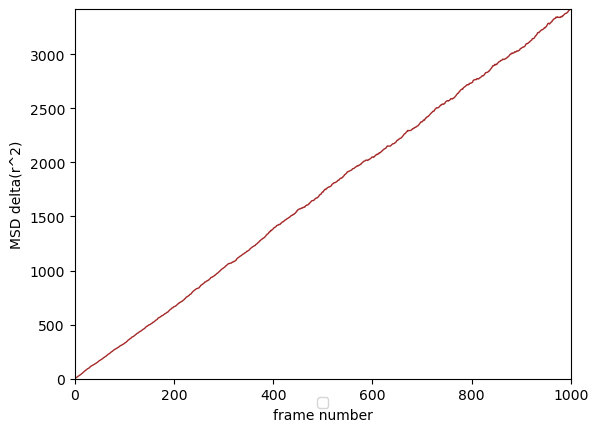

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：27.51 s


In [12]:
# MSD in 300K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()


dr=[]
t=[]
radial=[]
coord0=[]

i=0
dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_300/water_300_' + str(i) + '.csv')
atom_coord = dataset.iloc[:, [2,3,4]].values
for j in range(0,4498,3):
    coord0.append([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])

# 10 frames per sample once
for i in range(0,1001):
    r=0
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_300/water_300_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    for j in range(0,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
        #print(j,coord)
        r=r+((coord[0]-coord0[j//3][0])**2+(coord[1]-coord0[j//3][1])**2+(coord[2]-coord0[j//3][2])**2)/1499
    dr.append(r)
    t.append(i)
    coord.clear()

coord0.clear()
#print(dr)



    

plt.plot(t, dr, color='brown', lw=1, )
plt.xlim([0,1000])
plt.ylim([0,dr[1000]])
plt.ylabel('MSD delta(r^2)')
plt.xlabel('frame number')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

dr.clear()
t.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Water MSD in 400K, sample per 10 frames, averaged by 1500 molecules

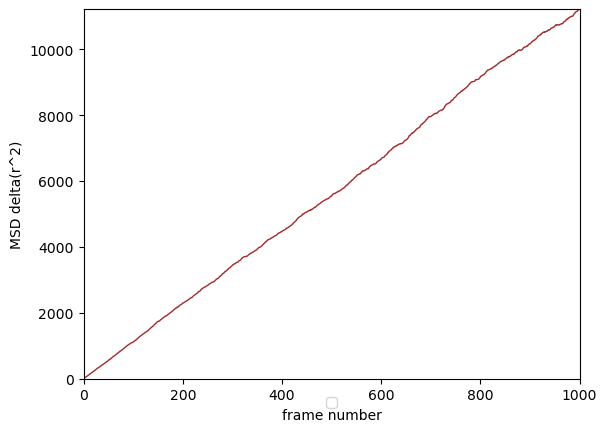

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：27.11 s


In [13]:
# MSD in 400K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()


dr=[]
t=[]
radial=[]
coord0=[]

i=0
dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_400/water_400_' + str(i) + '.csv')
atom_coord = dataset.iloc[:, [2,3,4]].values
for j in range(0,4498,3):
    coord0.append([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])

# 1 frames per sample once
for i in range(0,1001):
    r=0
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_400/water_400_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    for j in range(0,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
        #print(j,coord)
        r=r+((coord[0]-coord0[j//3][0])**2+(coord[1]-coord0[j//3][1])**2+(coord[2]-coord0[j//3][2])**2)/1499
    dr.append(r)
    t.append(i)
    coord.clear()

coord0.clear()
#print(dr)



    

plt.plot(t, dr, color='brown', lw=1, )
plt.xlim([0,1000])
plt.ylim([0,dr[1000]])
plt.ylabel('MSD delta(r^2)')
plt.xlabel('frame number')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), fancybox=True, ncol=5, labels=[])
plt.show()

dr.clear()
t.clear()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Diffusion of molecules in 400K

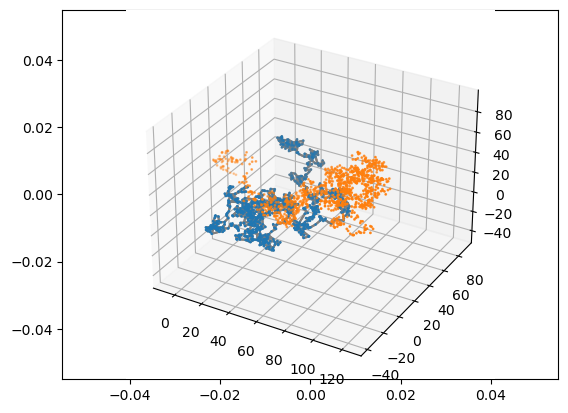

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：8.36 s


In [14]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()
x=[]
y=[]
z=[]
x1=[]
y1=[]
z1=[]


# 1 frames per sample once
for i in range(0,1001):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_400/water_400_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    x.append(atom_coord[0][0])
    y.append(atom_coord[0][1])
    z.append(atom_coord[0][2])
    x1.append(atom_coord[100][0])
    y1.append(atom_coord[100][1])
    z1.append(atom_coord[100][2])
coord0.clear()
#print(dr)


ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  
ax1.scatter3D(x,y,z, cmap='Blues',s=1)  
ax1.plot3D(x,y,z,'gray')  
ax1.scatter3D(x1,y1,z1, cmap='Red',s=1)
ax1.plot3D(x,y,z,'gray') 
plt.show()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Diffusion of molecules in 300K

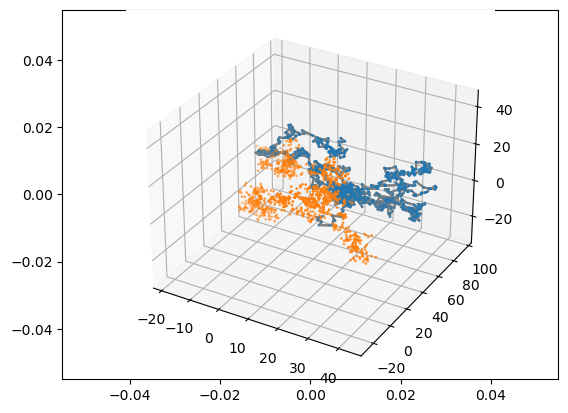

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：8.01 s


In [15]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()
x=[]
y=[]
z=[]
x1=[]
y1=[]
z1=[]


# 1 frames per sample once
for i in range(0,1001):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_300/water_300_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    x.append(atom_coord[0][0])
    y.append(atom_coord[0][1])
    z.append(atom_coord[0][2])
    x1.append(atom_coord[100][0])
    y1.append(atom_coord[100][1])
    z1.append(atom_coord[100][2])
coord0.clear()
#print(dr)


ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  
ax1.scatter3D(x,y,z, cmap='Blues',s=1)  
ax1.plot3D(x,y,z,'gray')  
ax1.scatter3D(x1,y1,z1, cmap='Red',s=1)
ax1.plot3D(x,y,z,'gray') 
plt.show()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Diffusion of molecules in 273K

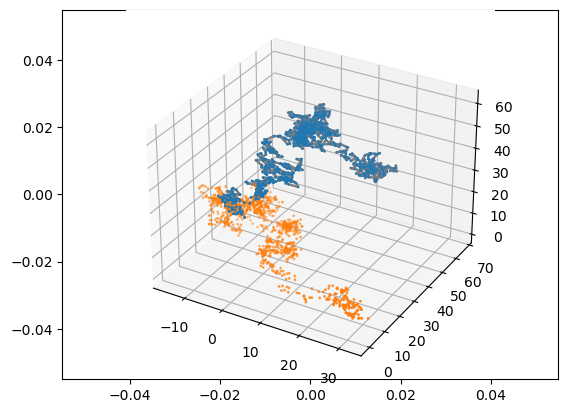

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：6.98 s


In [16]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()
x=[]
y=[]
z=[]
x1=[]
y1=[]
z1=[]


# 1 frames per sample once
for i in range(0,1001):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    x.append(atom_coord[0][0])
    y.append(atom_coord[0][1])
    z.append(atom_coord[0][2])
    x1.append(atom_coord[100][0])
    y1.append(atom_coord[100][1])
    z1.append(atom_coord[100][2])
coord0.clear()
#print(dr)


ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  
ax1.scatter3D(x,y,z, cmap='Blues',s=1)  
ax1.plot3D(x,y,z,'gray')  
ax1.scatter3D(x1,y1,z1, cmap='Red',s=1)
ax1.plot3D(x,y,z,'gray') 
plt.show()

#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Hydrogen bond structure in 273K (time-variation)

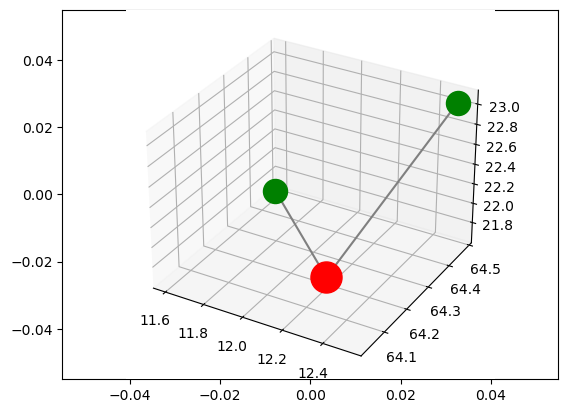

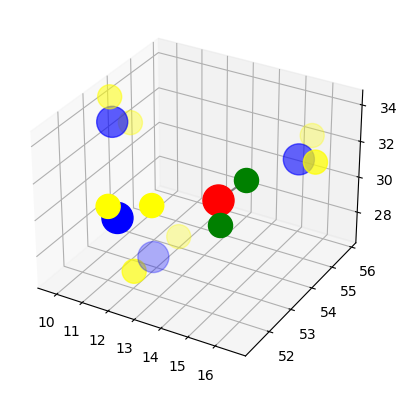

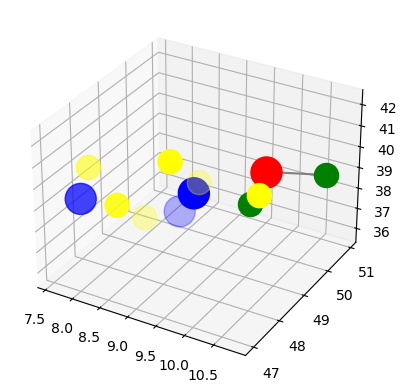

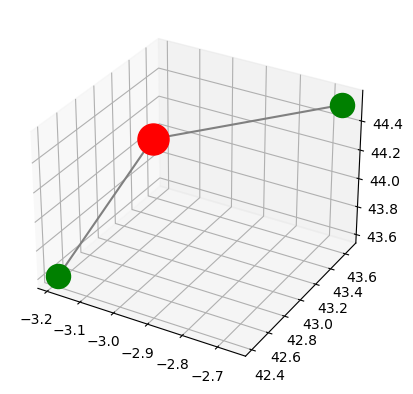

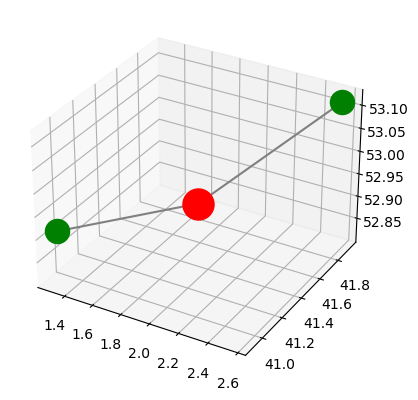

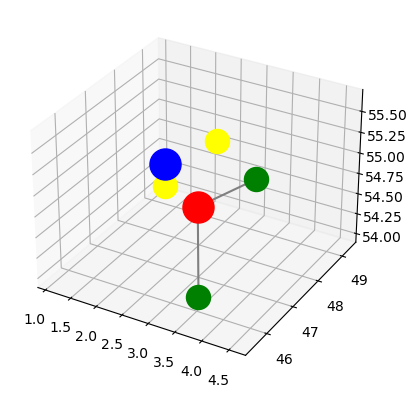

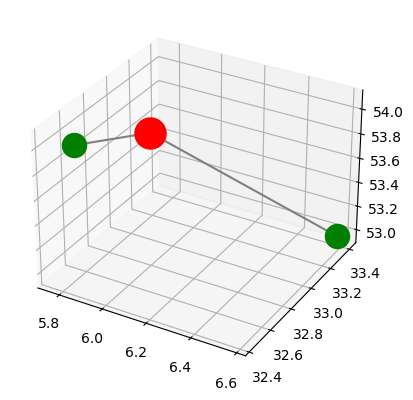

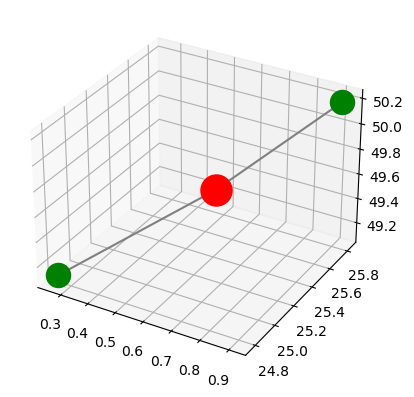

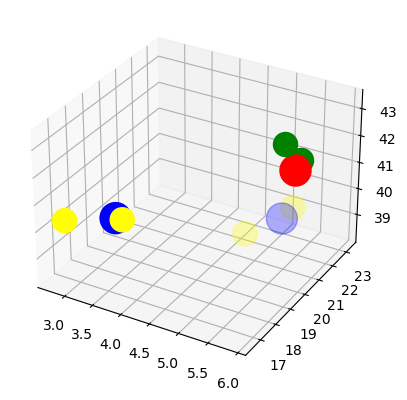

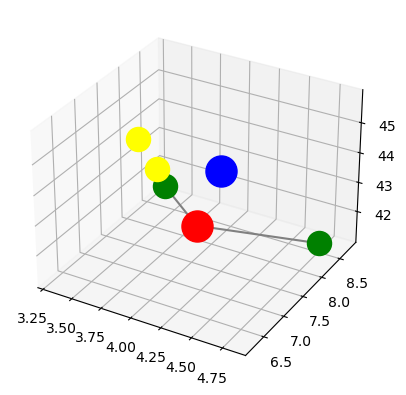

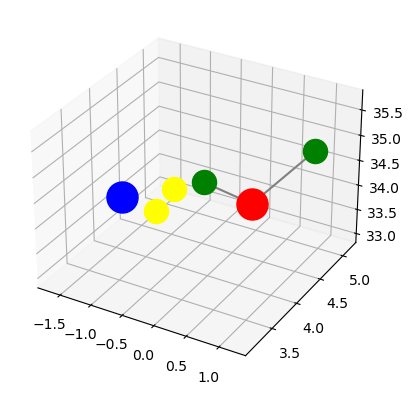

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：4.73 s


In [17]:
# Hydrogen bonds in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 100 frames per sample once



for i in range(0,1001,100):
    X=[]
    Y=[]
    Z=[]
    X1=[]
    Y1=[]
    Z1=[]
    X2=[]
    Y2=[]
    Z2=[]
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
    #print(atom_coord)
    for j in range(3,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
# Suppose hydrogen bonds are no more than 300 pm. (O..H-O)
        if ((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2<=25):
            X.append(coord[0])
            Y.append(coord[1])
            Z.append(coord[2])
            X1.append(atom_coord[j+1][0])
            Y1.append(atom_coord[j+1][1])
            Z1.append(atom_coord[j+1][2])
            X2.append(atom_coord[j+2][0])
            Y2.append(atom_coord[j+2][1])
            Z2.append(atom_coord[j+2][2])
            
   
    ax1 = plt.axes(projection='3d')
    #ax = fig.add_subplot(111,projection='3d')  
    ax1.scatter3D(atom_coord[0][0],atom_coord[0][1],atom_coord[0][2], color='Red',s=500)   
    ax1.scatter3D(atom_coord[1][0],atom_coord[1][1],atom_coord[1][2], color='Green',s=300)
    ax1.scatter3D(atom_coord[2][0],atom_coord[2][1],atom_coord[2][2], color='Green',s=300)
    ax1.plot3D([atom_coord[0][0],atom_coord[1][0]],[atom_coord[0][1],atom_coord[1][1]],[atom_coord[0][2],atom_coord[1][2]], 'gray') 
    ax1.plot3D([atom_coord[0][0],atom_coord[2][0]],[atom_coord[0][1],atom_coord[2][1]],[atom_coord[0][2],atom_coord[2][2]], 'gray')
    ax1.scatter3D(X,Y,Z, color='Blue',s=500)  
    ax1.scatter3D(X1,Y1,Z1, color='Yellow',s=300) 
    ax1.scatter3D(X2,Y2,Z2, color='Yellow',s=300) 
    plt.show()


#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Hydrogen bond structure in 300K (time-variation)

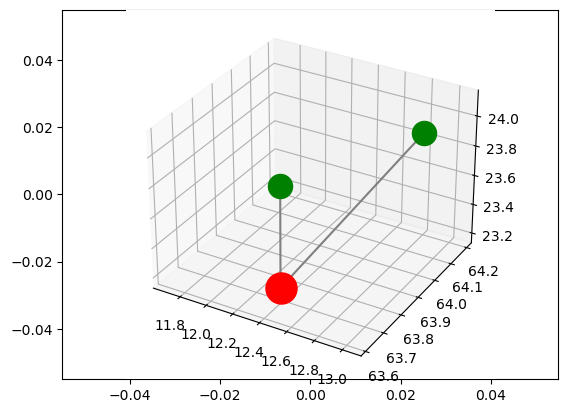

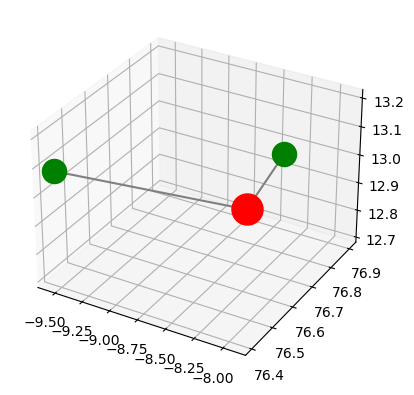

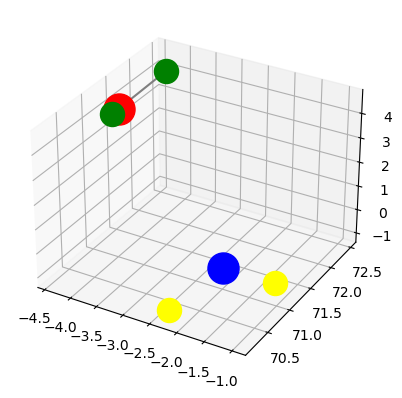

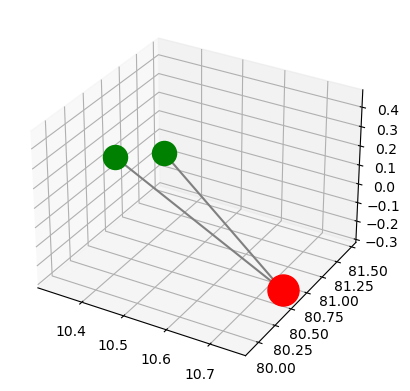

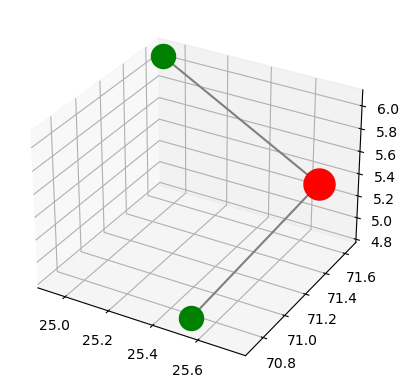

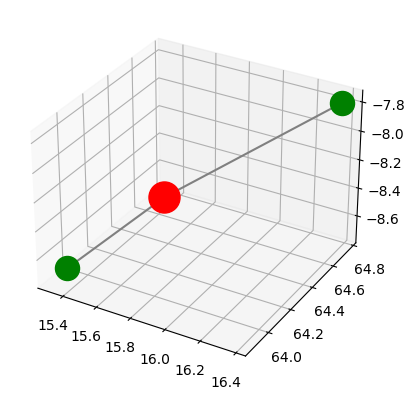

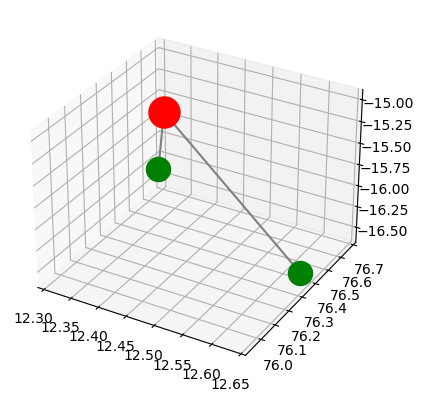

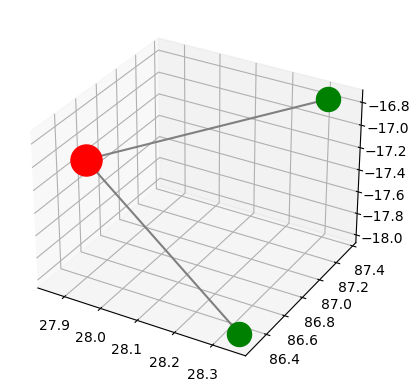

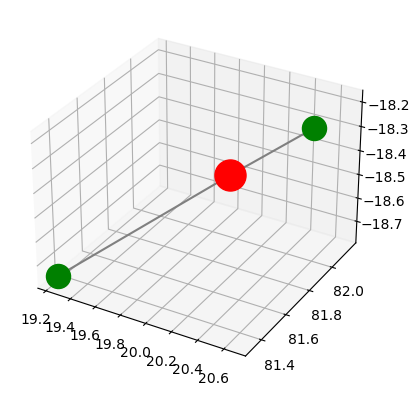

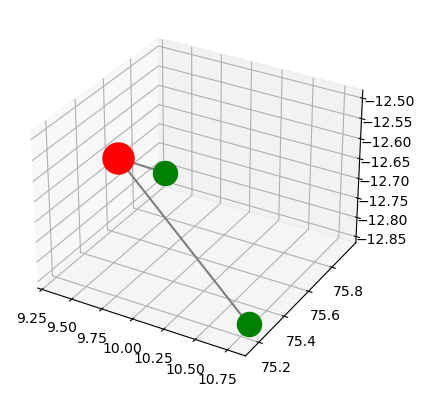

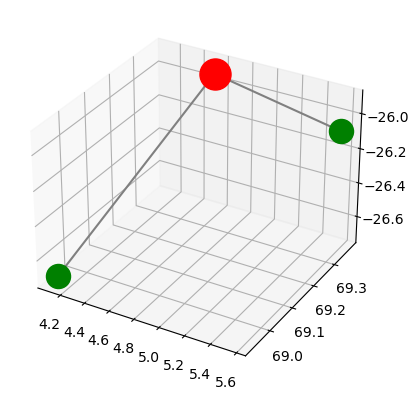

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：4.61 s


In [18]:
# Hydrogen bonds in 300K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 100 frames per sample once



for i in range(0,1001,100):
    X=[]
    Y=[]
    Z=[]
    X1=[]
    Y1=[]
    Z1=[]
    X2=[]
    Y2=[]
    Z2=[]
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_300/water_300_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
    #print(atom_coord)
    for j in range(3,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
# Suppose hydrogen bonds are no more than 300 pm. (O..H-O)
        if ((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2<=25):
            X.append(coord[0])
            Y.append(coord[1])
            Z.append(coord[2])
            X1.append(atom_coord[j+1][0])
            Y1.append(atom_coord[j+1][1])
            Z1.append(atom_coord[j+1][2])
            X2.append(atom_coord[j+2][0])
            Y2.append(atom_coord[j+2][1])
            Z2.append(atom_coord[j+2][2])
            
   
    ax1 = plt.axes(projection='3d')
    #ax = fig.add_subplot(111,projection='3d')  
    ax1.scatter3D(atom_coord[0][0],atom_coord[0][1],atom_coord[0][2], color='Red',s=500)   
    ax1.scatter3D(atom_coord[1][0],atom_coord[1][1],atom_coord[1][2], color='Green',s=300)
    ax1.scatter3D(atom_coord[2][0],atom_coord[2][1],atom_coord[2][2], color='Green',s=300)
    ax1.plot3D([atom_coord[0][0],atom_coord[1][0]],[atom_coord[0][1],atom_coord[1][1]],[atom_coord[0][2],atom_coord[1][2]], 'gray') 
    ax1.plot3D([atom_coord[0][0],atom_coord[2][0]],[atom_coord[0][1],atom_coord[2][1]],[atom_coord[0][2],atom_coord[2][2]], 'gray')
    ax1.scatter3D(X,Y,Z, color='Blue',s=500)  
    ax1.scatter3D(X1,Y1,Z1, color='Yellow',s=300) 
    ax1.scatter3D(X2,Y2,Z2, color='Yellow',s=300) 
    plt.show()


#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Hydrogen bond structure in 400K (time-variation)

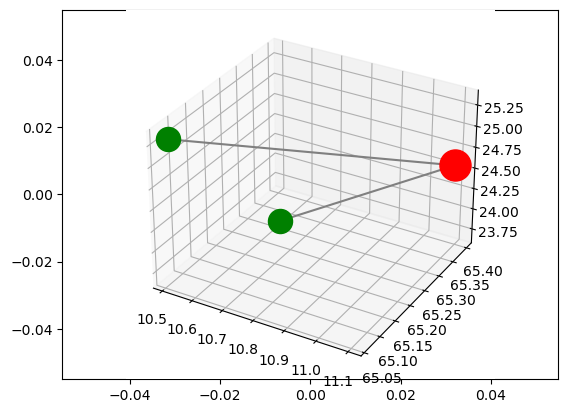

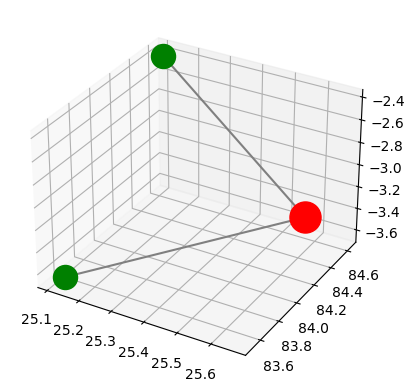

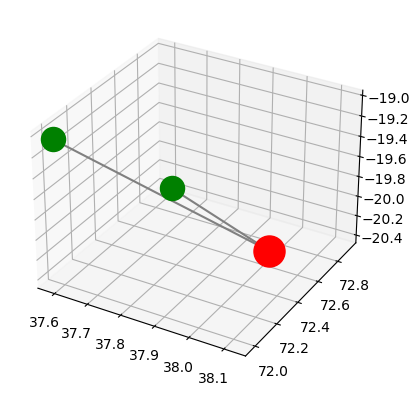

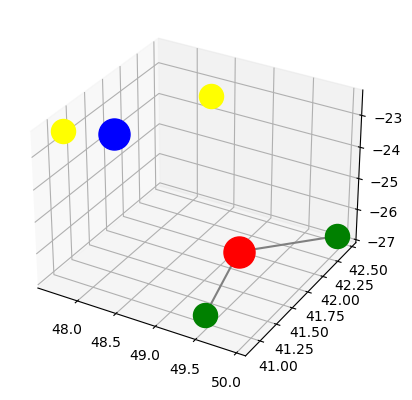

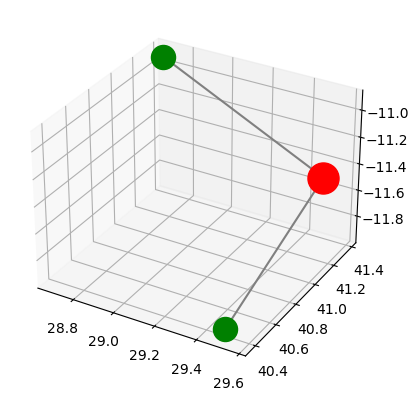

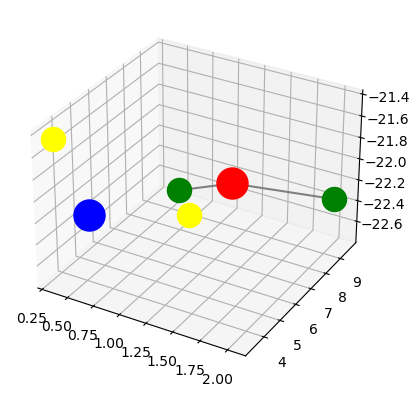

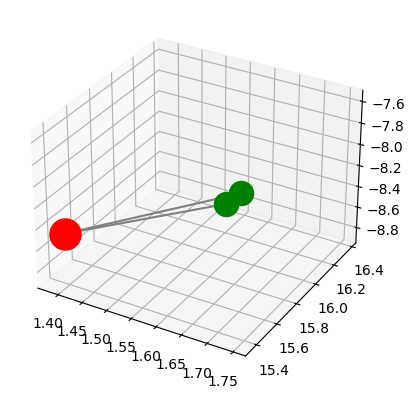

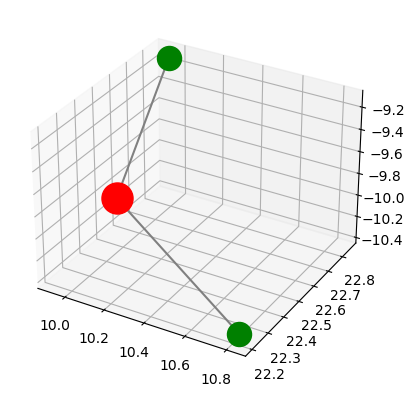

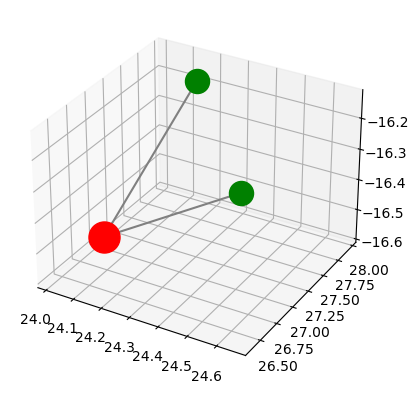

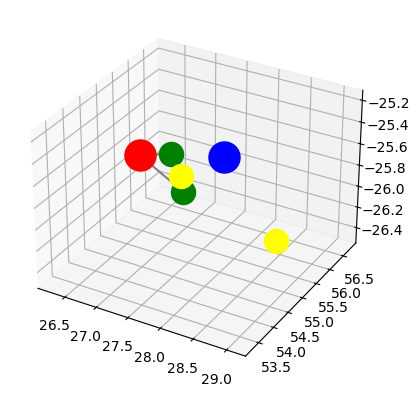

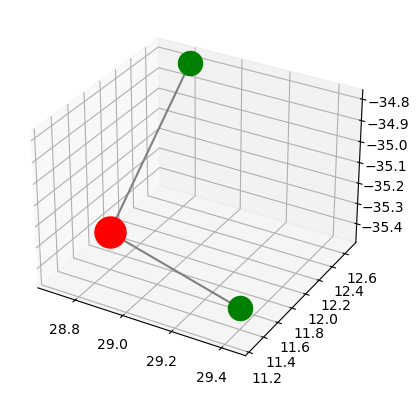

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：4.88 s


In [19]:
# Hydrogen bonds in 400K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 100 frames per sample once



for i in range(0,1001,100):
    X=[]
    Y=[]
    Z=[]
    X1=[]
    Y1=[]
    Z1=[]
    X2=[]
    Y2=[]
    Z2=[]
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_400/water_400_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    j = 0
    coord0=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
    #print(atom_coord)
    for j in range(3,4497,3):
        coord=([atom_coord[j][0], atom_coord[j][1], atom_coord[j][2]])
# Suppose hydrogen bonds are no more than 300 pm. (O..H-O)
        if ((coord[0]-coord0[0])**2+(coord[1]-coord0[1])**2+(coord[2]-coord0[2])**2<=25):
            X.append(coord[0])
            Y.append(coord[1])
            Z.append(coord[2])
            X1.append(atom_coord[j+1][0])
            Y1.append(atom_coord[j+1][1])
            Z1.append(atom_coord[j+1][2])
            X2.append(atom_coord[j+2][0])
            Y2.append(atom_coord[j+2][1])
            Z2.append(atom_coord[j+2][2])
            
   
    ax1 = plt.axes(projection='3d')
    #ax = fig.add_subplot(111,projection='3d')  
    ax1.scatter3D(atom_coord[0][0],atom_coord[0][1],atom_coord[0][2], color='Red',s=500)   
    ax1.scatter3D(atom_coord[1][0],atom_coord[1][1],atom_coord[1][2], color='Green',s=300)
    ax1.scatter3D(atom_coord[2][0],atom_coord[2][1],atom_coord[2][2], color='Green',s=300)
    ax1.plot3D([atom_coord[0][0],atom_coord[1][0]],[atom_coord[0][1],atom_coord[1][1]],[atom_coord[0][2],atom_coord[1][2]], 'gray') 
    ax1.plot3D([atom_coord[0][0],atom_coord[2][0]],[atom_coord[0][1],atom_coord[2][1]],[atom_coord[0][2],atom_coord[2][2]], 'gray')
    ax1.scatter3D(X,Y,Z, color='Blue',s=500)  
    ax1.scatter3D(X1,Y1,Z1, color='Yellow',s=300) 
    ax1.scatter3D(X2,Y2,Z2, color='Yellow',s=300) 
    plt.show()


#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))

# Bulk Diffusion Stucture in 273K

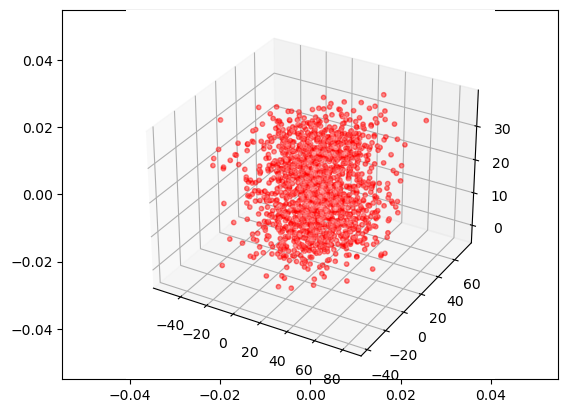

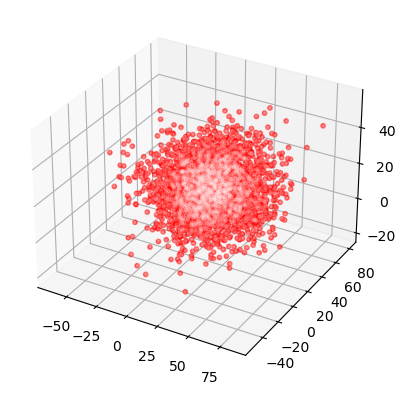

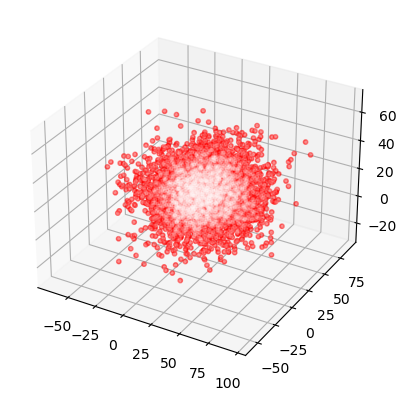

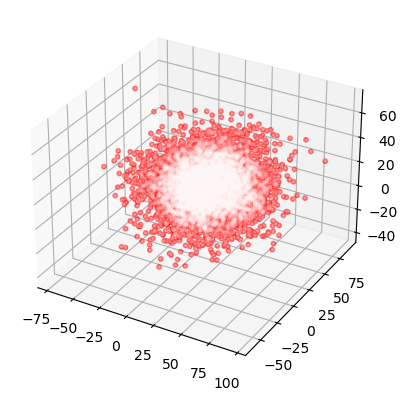

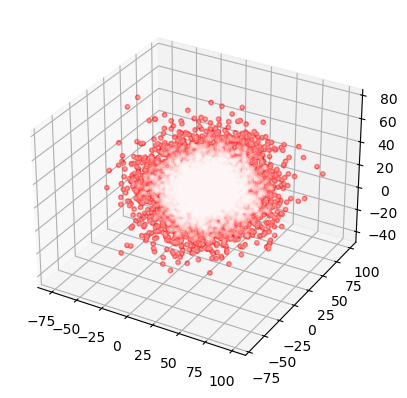

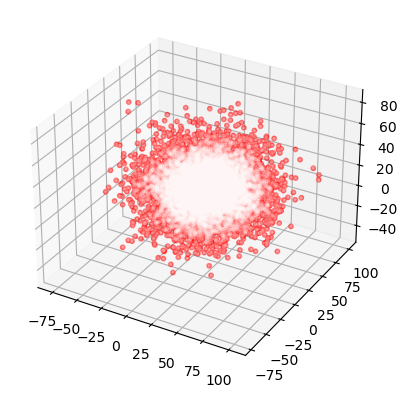

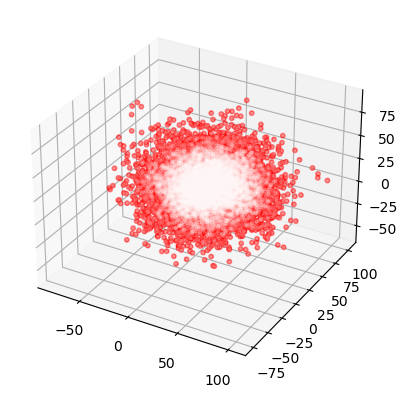

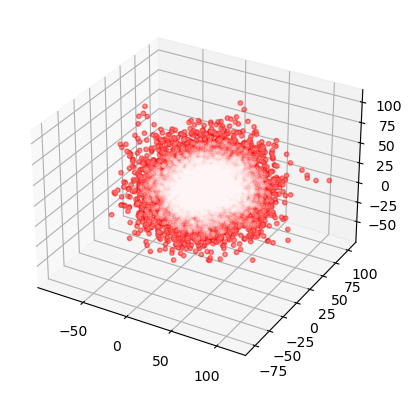

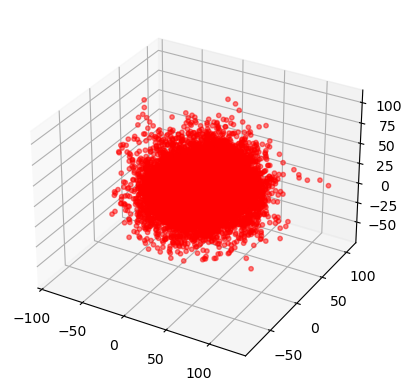

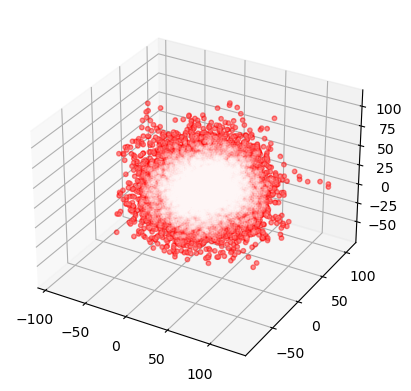

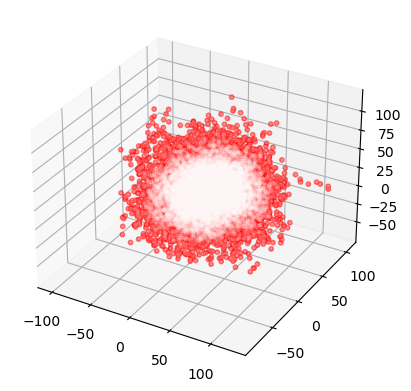

Current memory usage is 0.000533MB; Peak was 0.011158MB
time consumed：13.15 s


In [20]:
# Hydrogen bonds in 273K
import numpy as np
import pandas as pd 
import time
import tracemalloc
import math
import matplotlib.pyplot as plt

plt.plot()
tracemalloc.start()
current, peak = tracemalloc.get_traced_memory()
start = time.time()

# 100 frames per sample once

X=[]
Y=[]
Z=[]
X1=[]
Y1=[]
Z1=[]
X2=[]
Y2=[]
Z2=[]

for i in range(0,1001,100):
    dataset  = pd.read_csv('C:/Users/41227/Downloads/MD_water_trj/data_273/water_273_' + str(i) + '.csv')
    atom_coord = dataset.iloc[:, [2,3,4]].values
    for j in range(0,4497,3):
        X.append(atom_coord[j][0])
        Y.append(atom_coord[j][1])
        Z.append(atom_coord[j][2])
        X1.append(atom_coord[j+1][0])
        Y1.append(atom_coord[j+1][1])
        Z1.append(atom_coord[j+1][2])
        X2.append(atom_coord[j+2][0])
        Y2.append(atom_coord[j+2][1])
        Z2.append(atom_coord[j+2][2])
    ax1 = plt.axes(projection='3d')
    #ax = fig.add_subplot(111,projection='3d')  
    ax1.scatter3D(X,Y,Z, color='Red',s=10, alpha=0.5)  
    ax1.scatter3D(X1,Y1,Z1, color='White',s=5, alpha=0.1) 
    ax1.scatter3D(X2,Y2,Z2, color='White',s=5, alpha=0.1) 
    plt.show()
#print time and memory usage
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print("time consumed：%0.2f s"%(time.time()-start))